In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from fastai import *
from fastai.vision import *
from fastai.callbacks import *


# For loop Repeated Stratified K-Fold

In [2]:
df_Test_Train = pd.read_csv('Fastai_dataset_usable.csv')
df_Test_Train.drop(df_Test_Train.columns[df_Test_Train.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

df_Test_Train.head(100)

,Crp_Filepath,clutch,Day,egg_number,sex
0,Cropped_Egg_images/Clutch1_D18/egg2.JPG,1,18,2,Female
1,Cropped_Egg_images/Clutch1_D18/egg3.JPG,1,18,3,Female
2,Cropped_Egg_images/Clutch1_D18/egg4.JPG,1,18,4,Male
3,Cropped_Egg_images/Clutch1_D18/egg6.JPG,1,18,6,Female
4,Cropped_Egg_images/Clutch1_D18/egg9.JPG,1,18,9,Female
5,Cropped_Egg_images/Clutch1_D18/egg11.JPG,1,18,11,Female
6,Cropped_Egg_images/Clutch1_D18/egg15.JPG,1,18,15,Female
7,Cropped_Egg_images/Clutch1_D18/egg16.JPG,1,18,16,Male
8,Cropped_Egg_images/Clutch1_D18/egg17.JPG,1,18,17,Female
9,Cropped_Egg_images/Clutch1_D18/egg19.JPG,1,18,19,Male


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


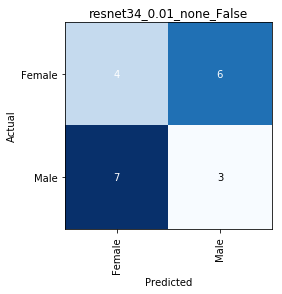

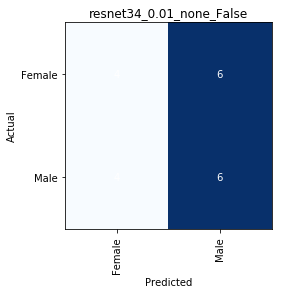

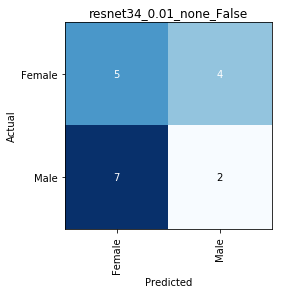

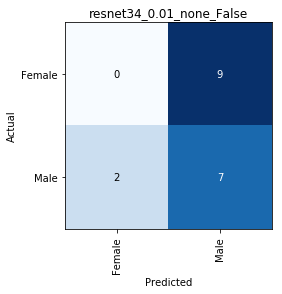

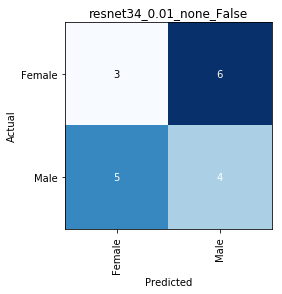

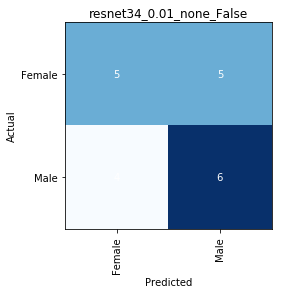

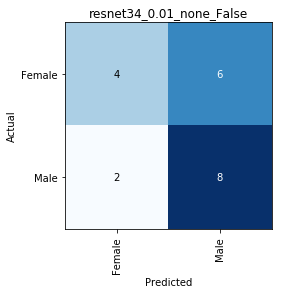

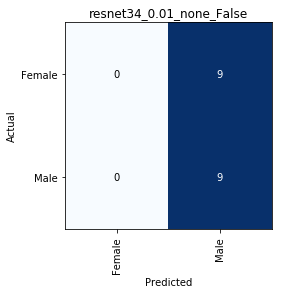

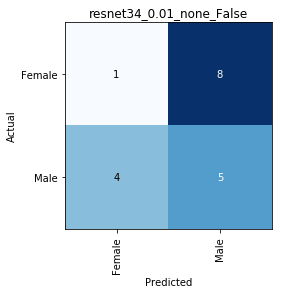

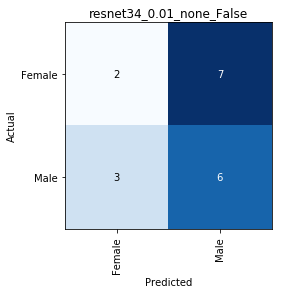

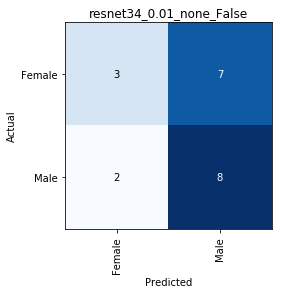

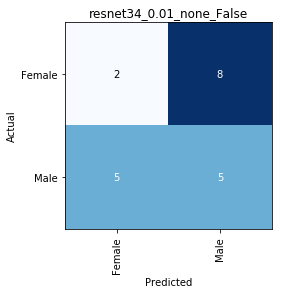

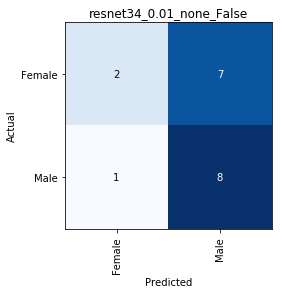

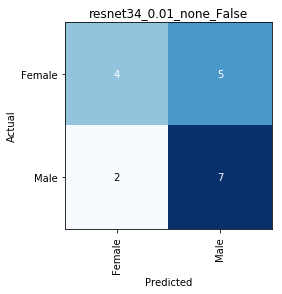

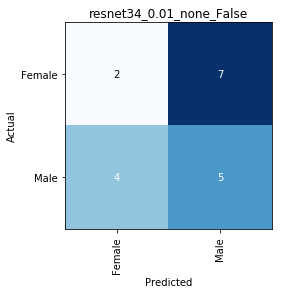

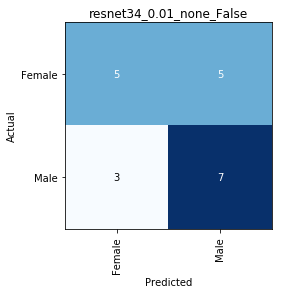

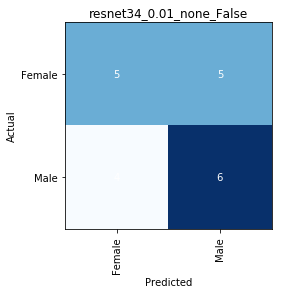

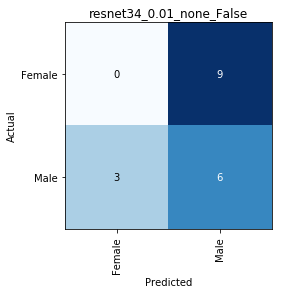

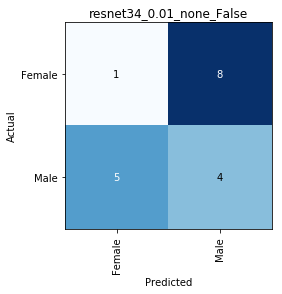

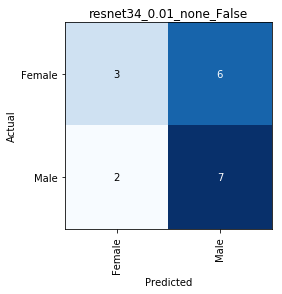

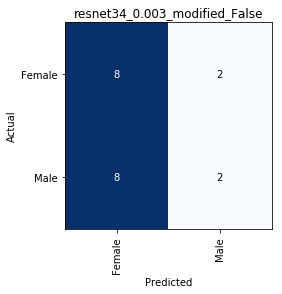

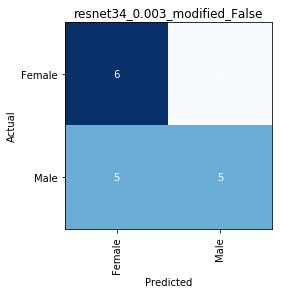

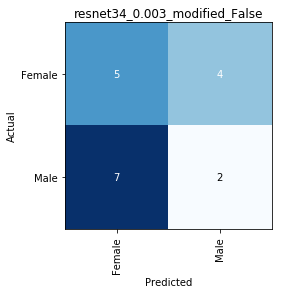

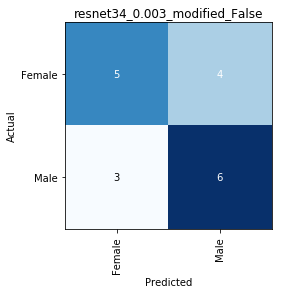

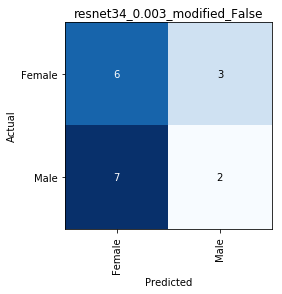

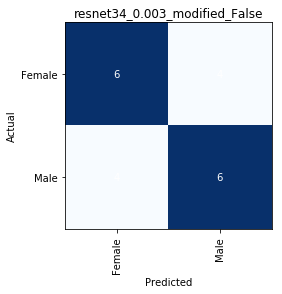

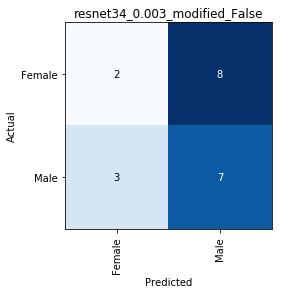

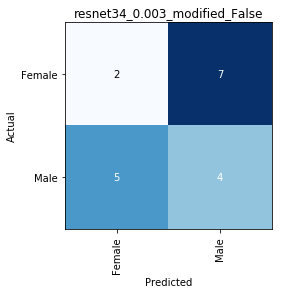

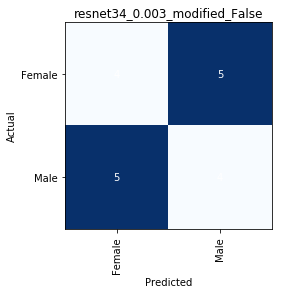

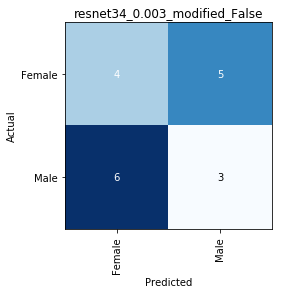

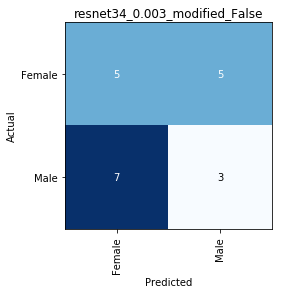

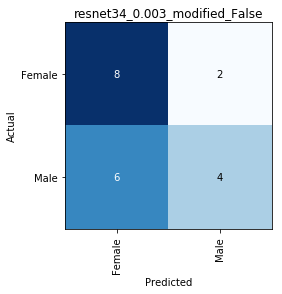

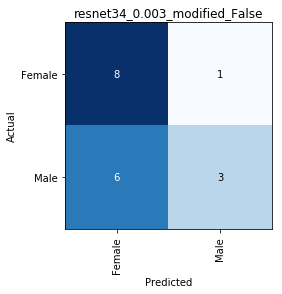

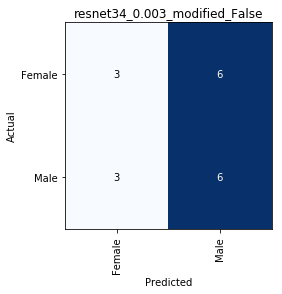

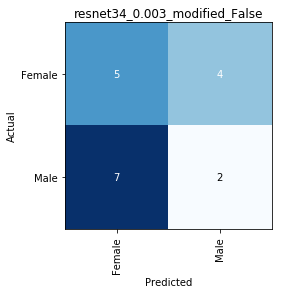

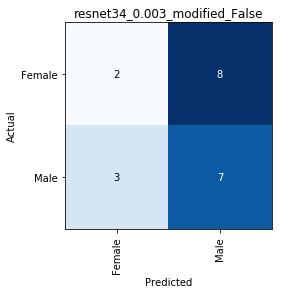

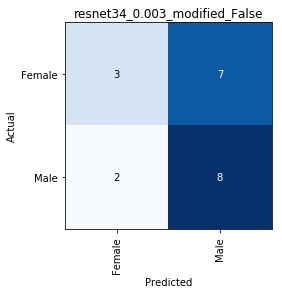

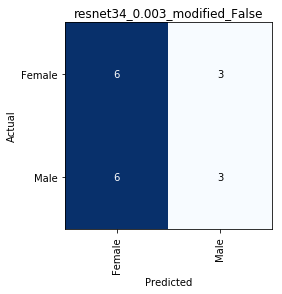

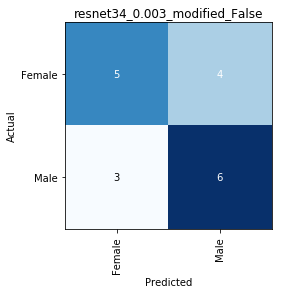

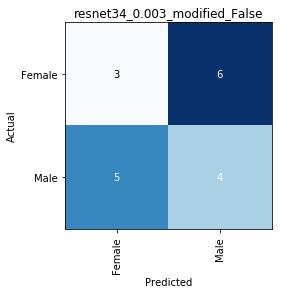

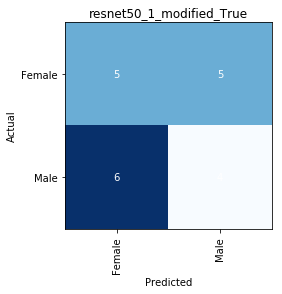

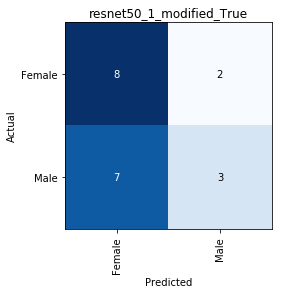

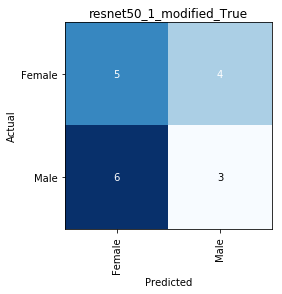

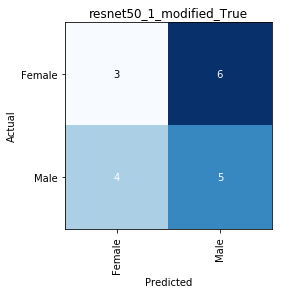

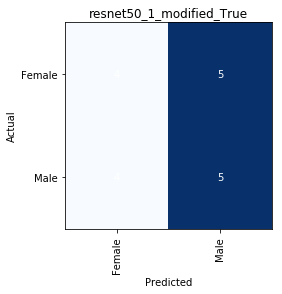

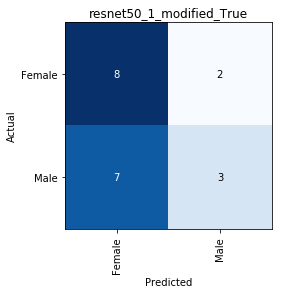

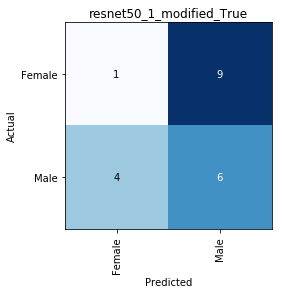

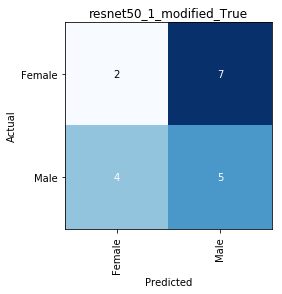

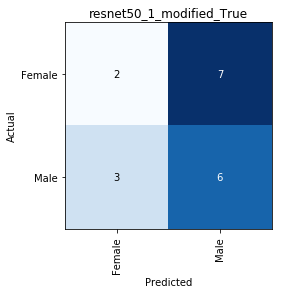

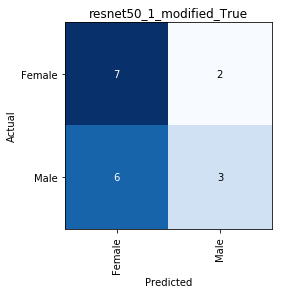

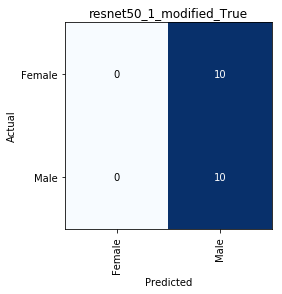

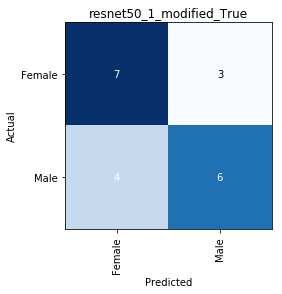

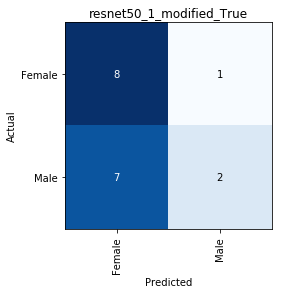

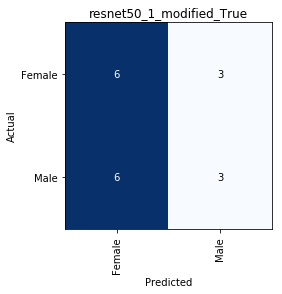

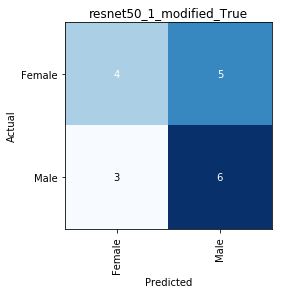

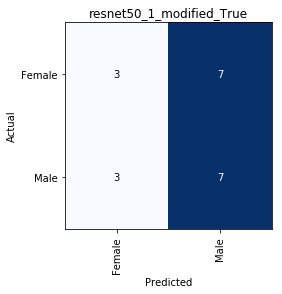

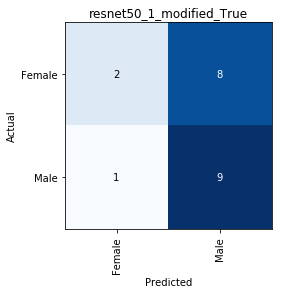

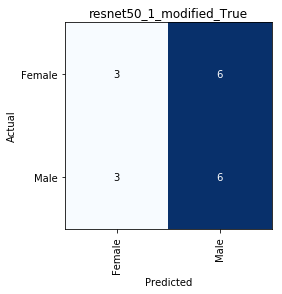

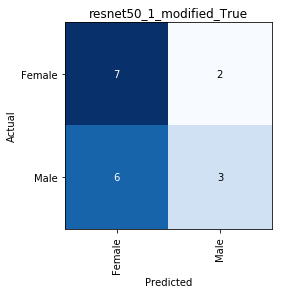

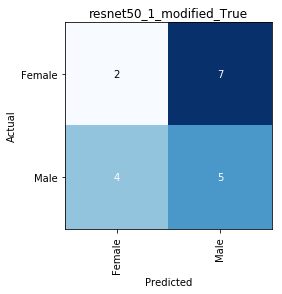

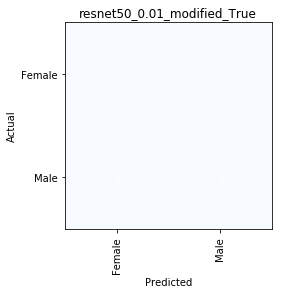

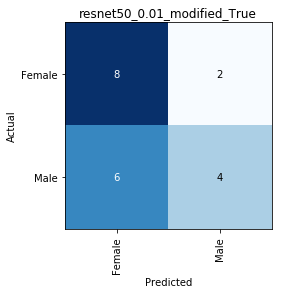

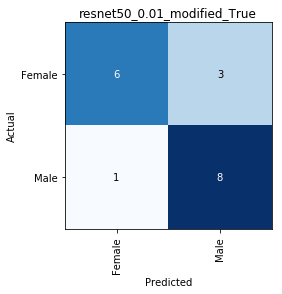

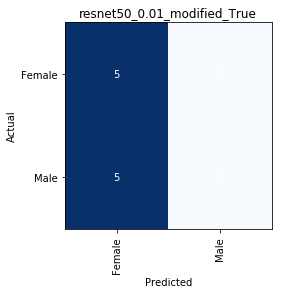

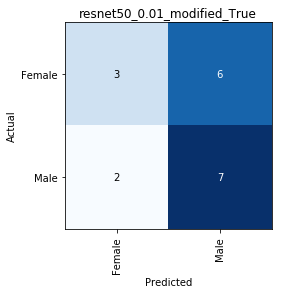

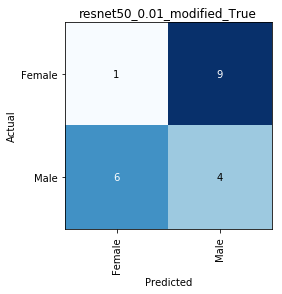

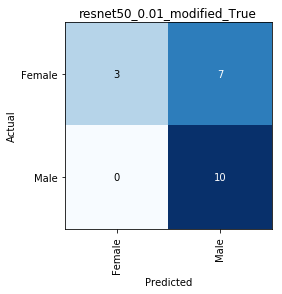

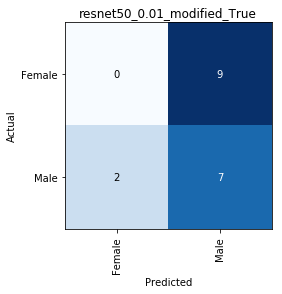

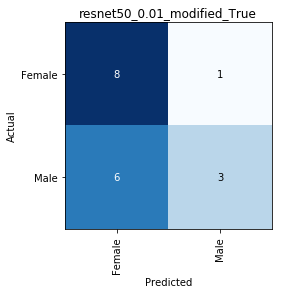

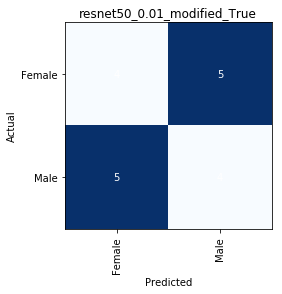

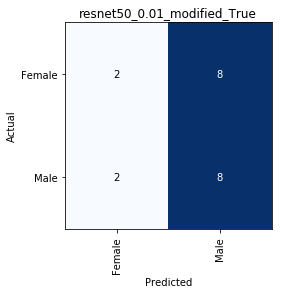

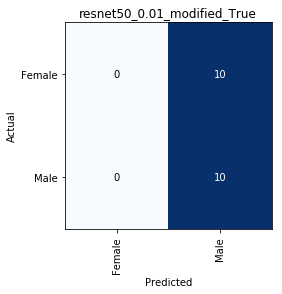

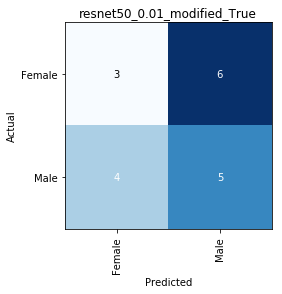

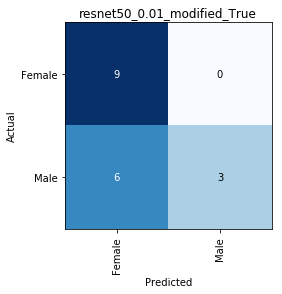

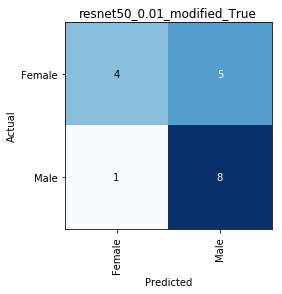

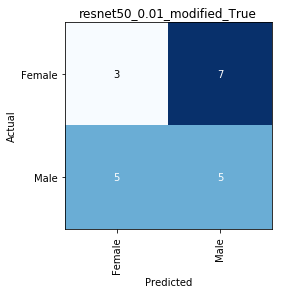

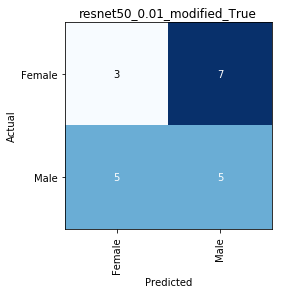

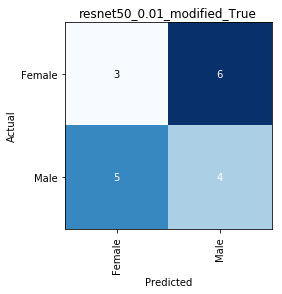

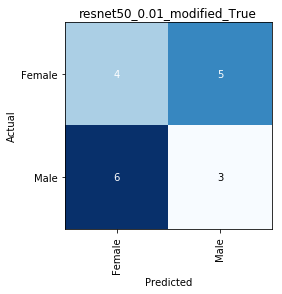

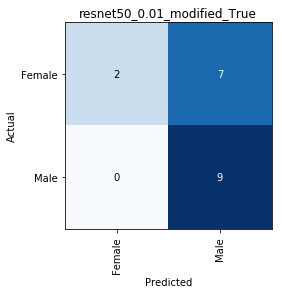

In [3]:
### For loop
'''Things we want:
        -arches: Resnet50, Resnet34
        -wds: .01, .003, 1
        -transforms: None, Modified
        -normalization: True and False
        -folds:5
        -repeats:5
'''

# Parameters to very
modelarch= [models.resnet34, models.resnet50]
weight_decay = [.01,.003, 1]
normalization = [True, False]
epoch_cycles=7
np.random.seed(42)
modified = get_transforms(do_flip = True, flip_vert = False, max_rotate = 35, max_lighting = None, max_warp = .2, p_lighting = 0)

# Tests to Perform

tests = [[models.resnet34,.01, None, False],
         [models.resnet34, .003, modified, False],
         [models.resnet50, 1, modified, True],
         [models.resnet50, .01, modified, True]]

# Creating Frame Work
DFBig = pd.DataFrame(columns = ['test_name','model_arch', 'transforms', 'normalized',
                                'weight_decay', 'split_num', 'max_error', 'min_error', 'avg_error', 'train_df'])
# Creating Stratified K folds
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=4)

# For loop for test
split_num = 1
for x in tests:
    wd = x[1]
    norm = x[3]
    arch = x[0]
    archstr = str(arch).split(' ')[1]
    if x[2] is not None:
        tsfmstr = 'modified'
    else:
        tsfmstr = 'none'
    test_name = archstr + '_' + str(wd) + '_' + tsfmstr + '_' + str(x[3])
    
    for train_index, val_index in rskf.split(df_Test_Train.index, df_Test_Train.sex):
        print(test_name)
        if norm:
            data_fold = (ImageList.from_df(df_Test_Train,'/home/jplineb/Chicken_Proj')
                         .split_by_idxs(train_index, val_index)
                         .label_from_df(cols='sex')
                         .transform(x[2], size=224)
                         .databunch(bs = 2)).normalize()
        else:
            data_fold = (ImageList.from_df(df_Test_Train,'/home/jplineb/Chicken_Proj')
                         .split_by_idxs(train_index, val_index)
                         .label_from_df(cols='sex')
                         .transform(x[2], size=224)
                         .databunch(bs = 2))
            
        learn = cnn_learner(data_fold, arch, metrics=error_rate, callback_fns = [CSVLogger], wd=wd)
        learn.fit_one_cycle(epoch_cycles)
        
        df_history = pd.read_csv('history.csv') # Appends to dataframe
        DFBig = DFBig.append({'test_name': test_name,
                              'model_arch': archstr,
                              'transforms': tsfmstr,
                              'normalized': str(norm),
                              'weight_decay': wd,
                              'split_num': split_num, # indicates kfold split
                              'max_error' : df_history.error_rate.max(),
                              'min_error': df_history.error_rate.min(),
                              'avg_error': df_history.error_rate.mean(),
                              'train_df': df_history}, ignore_index = True)
        
        interp = ClassificationInterpretation.from_learner(learn)
        interp.plot_confusion_matrix(return_fig=True, title=test_name)
        split_num += 1
        DFBig.to_csv('DF_resnet34_resnet50.csv')
        
        

    
    
    
    



Results from the testing:
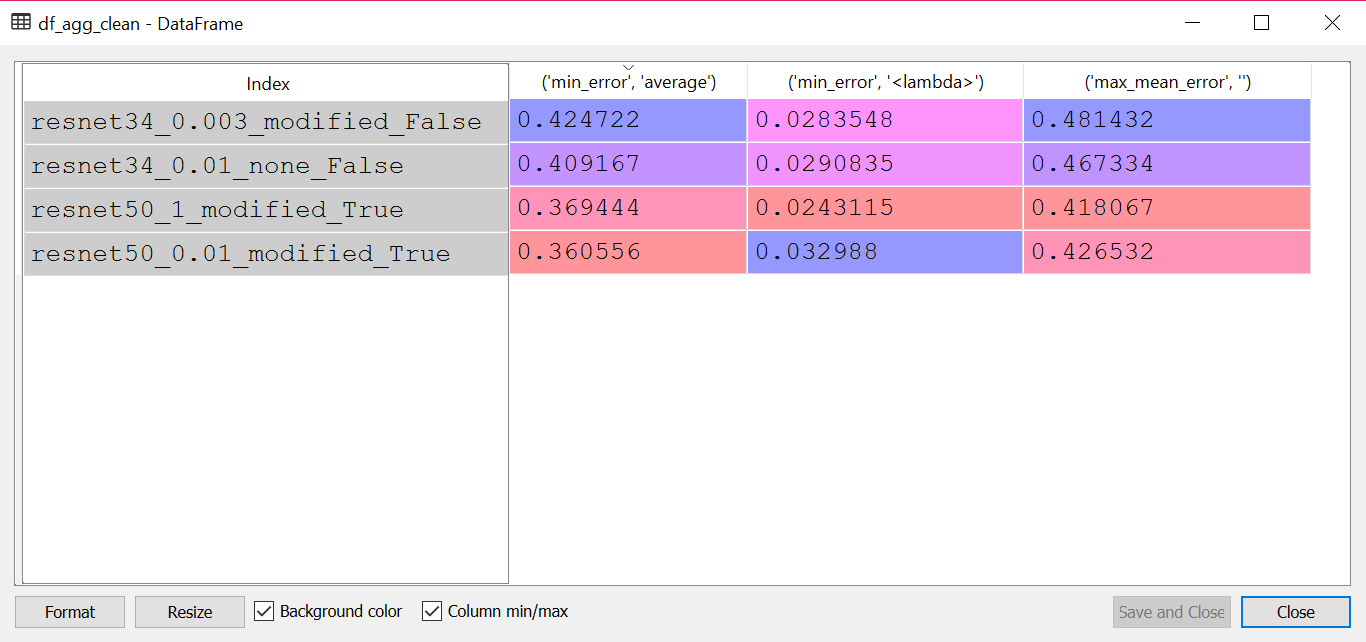

However we reliazed that using the min_error method of finding the best hyperparameters leaves in bias so we continued with AUROC from here on out.

[New hyperparameter method](Previous%20best%20and%20new%20hyperparameter%20search.ipynb)